In [ ]:
!pip install pyLDAvis
#you might have to restart runtime after running this command

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 71.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [ ]:
import re
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import  accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
chatgpt=pd.read_csv("/content/drive/Shareddrives/453 Group/Chatgpt_twitter_analysis.csv")

In [ ]:
chatgpt.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [ ]:
chatgpt.dtypes

Unnamed: 0     int64
tweets        object
labels        object
dtype: object

In [ ]:
print(chatgpt.shape)

(219294, 3)


In [ ]:
print(chatgpt.isna().sum())

Unnamed: 0    0
tweets        0
labels        0
dtype: int64


## Data Preprocessing

In [ ]:
chatgpt = chatgpt[['tweets', 'labels']]

In [ ]:
chatgpt.head()

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [ ]:
# View the first 10 rows in the tweets column

for i in chatgpt.tweets.head(10):
    print(i)
    print()

ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI

Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr

ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34

THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71

As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1

Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64

As of 2 minutes ago, @OpenAI release

In [ ]:
# Remove all the tweet links since they all begin with https:

chatgpt['tweet_text'] = chatgpt['tweets'].str.split('https:')
chatgpt = chatgpt[['tweet_text', 'labels']]

In [ ]:
chatgpt.head()

,tweet_text,labels
0,[ChatGPT: Optimizing Language Models for Dialo...,neutral
1,"[Try talking with ChatGPT, our new AI system w...",good
2,[ChatGPT: Optimizing Language Models for Dialo...,neutral
3,"[THRILLED to share that ChatGPT, our new model...",good
4,"[As of 2 minutes ago, @OpenAI released their n...",bad


In [ ]:
# View the first 10 rows in the tweets column

for i in chatgpt.tweet_text.head(10):
    print(i)


['ChatGPT: Optimizing Language Models for Dialogue ', '//t.co/K9rKRygYyn @OpenAI']
['Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. ', '//t.co/sHDm57g3Kr']
['ChatGPT: Optimizing Language Models for Dialogue ', '//t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\\n\\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer ', '//t.co/RprmAXUp34']
['THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. ', '//t.co/dyvtHecYbd ', '//t.co/DdhzhqhCBX ', '//t.co/l8qTLure71']
['As of 2 minutes ago, @OpenAI released their new ChatGPT. \\n\\nAnd you can use it right now 👇 ', '//t.co/VyPGPNw988 ', '//t.co/cSn5h6h1M1']
['Just launched ChatGPT, our new AI system which is optimized for dialogue: ', '//t.co/ArX6m0FfLE.\\n\\nTry it out here: ', '//t.co/YM1gp5bA64']
['As of 2 minutes ago, @OpenAI rel

In [ ]:
text = [i[0] for i in chatgpt.tweet_text]

In [ ]:
# Remove all non-alphanumeric characters from the text list
string = r'[A-Za-z0-9 ]'

trim_list=[]

for row in text:
    s=''
    for letter in row:
        if bool(re.match(string, letter)):
            s+=letter
    trim_list.append(s)

In [ ]:
# Remove the non-printing characters from text

rep_list = ['\U0001fae1', '\\n', '@', '#', '\xa0', '***']

for i in trim_list:
    for j in rep_list:
        if j in i:
            i.replace(j,'')

In [ ]:
chatgpt['tweet_text'] = trim_list

In [ ]:
# View the first 10 rows in the tweets column

for i in chatgpt.tweet_text.head(10):
    print(i)


ChatGPT Optimizing Language Models for Dialogue 
Try talking with ChatGPT our new AI system which is optimized for dialogue Your feedback will help us improve it 
ChatGPT Optimizing Language Models for Dialogue 
THRILLED to share that ChatGPT our new model optimized for dialog is now public free and accessible to everyone 
As of 2 minutes ago OpenAI released their new ChatGPT nnAnd you can use it right now  
Just launched ChatGPT our new AI system which is optimized for dialogue 
As of 2 minutes ago OpenAI released their new ChatGPT nnAnd you can use it right now n n
ChatGPT coming out strong refusing to help me stalk someone but agreeing providing that someone is Waldo 
0penAl just deployed a thing Ive been helping build the last couple of months its a chatbot based on GPT 3 Im really excited to share this vln
Research preview of our newest model ChatGPTnnWere trying something new with this preview Free and immediately available for everyone no waitlist 


In [ ]:
chatgpt.head()

,tweet_text,labels
0,ChatGPT Optimizing Language Models for Dialogue,neutral
1,Try talking with ChatGPT our new AI system whi...,good
2,ChatGPT Optimizing Language Models for Dialogue,neutral
3,THRILLED to share that ChatGPT our new model o...,good
4,As of 2 minutes ago OpenAI released their new ...,bad


labels
bad        107796
good        56011
neutral     55487
Name: count, dtype: int64


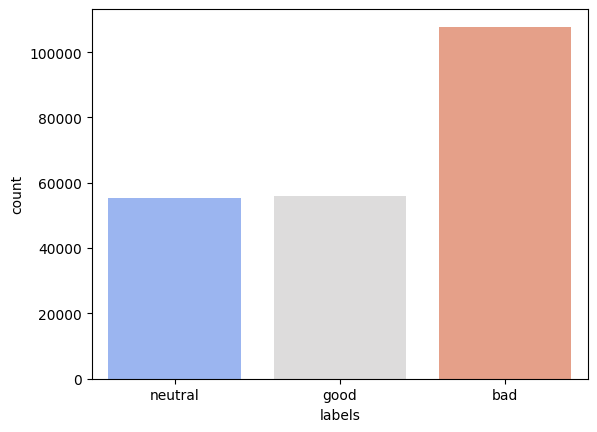

In [ ]:
# Assuming you have loaded your dataset and it is stored in the variable 'df'
label_counts = chatgpt['labels'].value_counts()
print(label_counts)

sns.countplot(data=chatgpt, x='labels', palette='coolwarm')
plt.show()


In [ ]:
chatgpt['lab_int'] = np.where(chatgpt['labels']=='good', 1, np.where(chatgpt['labels']=='bad', -1, 0))
chatgpt['labels']=chatgpt['lab_int']
chatgpt = chatgpt[['tweet_text', 'labels']]

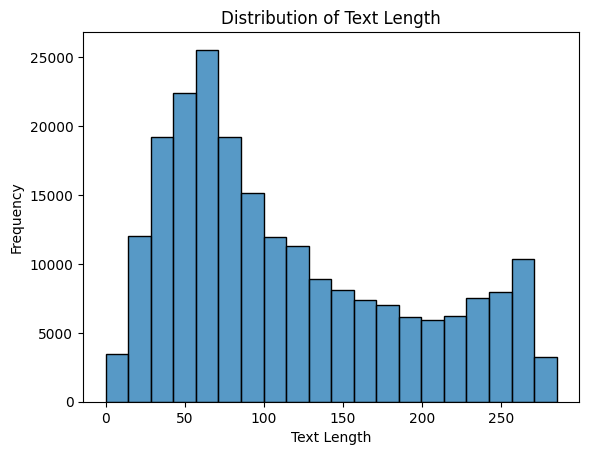

In [ ]:
# Text Length Analysis
chatgpt['text_length'] = chatgpt['tweet_text'].str.len()

# Distribution of Text Length
sns.histplot(data=chatgpt, x='text_length', bins=20)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

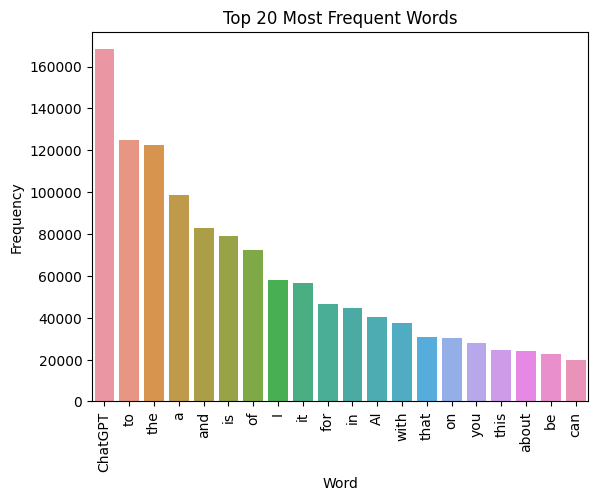

In [ ]:
# Word Frequency Analysis
word_freq = chatgpt['tweet_text'].str.split(expand=True).stack().value_counts()
top_20_words = word_freq.head(20)

sns.barplot(x=top_20_words.index, y=top_20_words.values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Correlation Analysis (example with text length and sentiment)
correlation_matrix = chatgpt[['text_length', 'labels']].corr()
correlation_matrix
# # Plot correlation matrix as a heatmap
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
# plt.xlabel('Features')
# plt.ylabel('Features')
# plt.title('Correlation Matrix')
# plt.show()

,text_length,labels
text_length,1.000000,0.344137
labels,0.344137,1.000000


In [ ]:
!pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
## All words
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(['chatgpt','openai', 'ai', 'write', 'will','use','using','try', 'talking', 'make', 'new', 'asked', 'system', 'optimized', 'dialogue', 'feedback', 'help', 'us', 'improve'])

for val in chatgpt.tweet_text:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

mask = np.array(Image.open("comment.png"))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, mask=mask).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

FileNotFoundError: ignored

In [ ]:
## Positive words
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(['chatgpt','openai','one', 'ai', 'write', 'will','use','using','try', 'talking', 'make', 'new', 'asked', 'system', 'optimized', 'dialogue', 'feedback', 'help', 'us', 'improve'])

for val, label in zip(chatgpt.tweet_text, chatgpt.labels):
    if label == 1:
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

mask = np.array(Image.open("comment.png"))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, mask=mask).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##Topic Analysis - LDA

In [ ]:
#generate model for positive comments
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
#model for positive comments
chatgpt_pos = chatgpt[chatgpt['labels'] == 1]
data = chatgpt_pos.tweet_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['try', 'talking', 'chatgpt', 'new', 'ai', 'system', 'optimized', 'dialogue', 'feedback', 'help', 'us', 'improve']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.069*"chatgpt" + 0.014*"resources" + 0.014*"free" + 0.014*"good" + '
  '0.014*"staking" + 0.013*"teacher" + 0.013*"alpha" + 0.013*"qualified" + '
  '0.012*"email" + 0.012*"didnt"'),
 (1,
  '0.033*"chatgpt" + 0.031*"price" + 0.027*"alzheimers" + 0.027*"join" + '
  '0.026*"passed" + 0.026*"increases" + 0.024*"bad" + 0.015*"significant" + '
  '0.010*"another" + 0.008*"amp"'),
 (2,
  '0.063*"chatgpt" + 0.034*"ai" + 0.027*"new" + 0.021*"like" + 0.009*"could" + '
  '0.007*"bring" + 0.006*"disease" + 0.006*"google" + 0.006*"wealth" + '
  '0.006*"optimistic"'),
 (3,
  '0.079*"chatgpt" + 0.023*"awesome" + 0.018*"ai" + 0.015*"check" + '
  '0.014*"master" + 0.014*"nn" + 0.013*"mainly" + 0.013*"youre" + '
  '0.013*"ideas" + 0.012*"looking"'),
 (4,
  '0.051*"chatgpt" + 0.037*"create" + 0.031*"favorite" + 0.024*"seo" + '
  '0.021*"youtube" + 0.020*"write" + 0.019*"new" + 0.018*"resolution" + '
  '0.018*"nnwhy" + 0.018*"connect"'),
 (5,
  '0.064*"chatgpt" + 0.030*"get" + 0.025*"much" + 0.014

In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
import os
import pandas as pd

# Assuming you have already trained your LDA model and have the following variables:
# lda_model: Trained LDA model
# corpus: Corpus of documents used for training the LDA model
# id2word: Mapping of word IDs to words in the vocabulary

pyLDAvis.enable_notebook()

# Prepare the data for visualization
vis_data = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

# Display the visualization
pyLDAvis.display(vis_data)


In [ ]:
#model for negative comments
chatgpt_pos = chatgpt[chatgpt['labels'] == -1]
data = chatgpt_pos.tweet_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['minutes', 'ago', 'openai', 'released', 'new', 'chatgpt', 'nnand', 'right']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]
[(0,
  '0.147*"chatgpt" + 0.064*"write" + 0.057*"asked" + 0.024*"stablediffusion" + '
  '0.018*"review" + 0.016*"heres" + 0.013*"poem" + 0.012*"story" + '
  '0.010*"wrote" + 0.009*"ai"'),
 (1,
  '0.069*"chatgpt" + 0.054*"ai" + 0.031*"seo" + 0.018*"generative" + '
  '0.016*"sejournal" + 0.016*"amp" + 0.015*"nchatgpt" + 0.014*"post" + '
  '0.013*"martinibuster" + 0.013*"mind"'),
 (2,
  '0.084*"chatgpt" + 0.015*"questions" + 0.011*"letters" + 0.009*"christmas" + '
  '0.009*"gpt" + 0.009*"cover" + 0.008*"published" + 0.007*"chat" + '
  '0.007*"email" + 0.006*"nn"'),
 (3,
  '0.120*"chatgpt" + 0.063*"google" + 0.043*"search" + 0.031*"gpt" + '
  '0.030*"openai" + 0.019*"new" + 0.018*"ai" + 0.017*"dalle" + 0.015*"chat" + '
  '0.013*"midjourney"'),
 (4,
  '0.104*"chatgpt" + 0.029*"ai" + 0.010*"going" + 0.007*"im" + 0.007*"get" + '
  '0.007*"time" + 0.006*

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.161334  0.018690       1        1  22.783406
6     -0.159060  0.056112       2        1  16.755771
5     -0.132888  0.102978       3        1  12.632381
3     -0.081110 -0.083030       4        1  10.728843
7     -0.046098 -0.165128       5        1   8.799434
0      0.065687  0.137407       6        1   8.244793
8      0.071890 -0.002042       7        1   5.838069
2      0.033398  0.096999       8        1   5.571012
1      0.089153 -0.220817       9        1   5.267494
9      0.320361  0.058829      10        1   3.378799, topic_info=           Term           Freq          Total Category  logprob  loglift
29       google    6735.000000    6735.000000  Default  30.0000  30.0000
14           ai   23401.000000   23401.000000  Default  29.0000  29.0000
45        write    6780.000000    6780.000000  Default  28.0000  28.0000
1       chatgpt  102914.000000  102914.000000  Default  27.0000  27.0000
37        asked    5382.000000    5382.000000  Default  26.0000  26.0000
..          ...            ...            ...      ...      ...      ...
647       crazy     303.288137     637.653572  Topic10  -4.6963   2.6445
1       chatgpt    1878.325050  102914.542925  Topic10  -2.8729  -0.6159
235  developers     201.470051     435.107153  Topic10  -5.1054   2.6177
316        yall     170.284139     278.893619  Topic10  -5.2736   2.8943
676       build     206.418894    1227.560522  Topic10  -5.0811   1.6048

[669 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4476      1  0.009686  academic
4476      5  0.004843  academic
4476      6  0.043585  academic
4476      8  0.939500  academic
1745      1  0.076164   account
...     ...       ...       ...
1313      8  0.058305      year
1313      9  0.006247      year
3529      4  0.994574      york
3529     10  0.003282      york
4285      7  0.999057   youtube

[1858 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 6, 4, 8, 1, 9, 3, 2, 10])

## Feature Extraction

In [ ]:
# Bag of Words representation
count_vectorizer = CountVectorizer()
bow_vectors = count_vectorizer.fit_transform(chatgpt['tweet_text'])

# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(chatgpt['tweet_text'])

# n-Grams representation
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))  # Example of 2 to 3-gram representation
ngram_vectors = ngram_vectorizer.fit_transform(chatgpt['tweet_text'])

In [ ]:
# Print the vocabulary size for each representation
print("Bag of Words Vocabulary Size:", len(count_vectorizer.vocabulary_))
print("TF-IDF Vocabulary Size:", len(tfidf_vectorizer.vocabulary_))
print("n-Grams Vocabulary Size:", len(ngram_vectorizer.vocabulary_))

Bag of Words Vocabulary Size: 162551
TF-IDF Vocabulary Size: 162551
n-Grams Vocabulary Size: 1238589


In [ ]:
chatgpt.head()

,tweet_text,labels,text_length
0,ChatGPT Optimizing Language Models for Dialogue,0,48
1,Try talking with ChatGPT our new AI system whi...,1,113
2,ChatGPT Optimizing Language Models for Dialogue,0,48
3,THRILLED to share that ChatGPT our new model o...,1,112
4,As of 2 minutes ago OpenAI released their new ...,-1,86


## Logistic Regression

In [ ]:
# Split the dataset into training and testing sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(bow_vectors, chatgpt['labels'], test_size=0.2, random_state=42)

# Initialize and train logistic regression models
logreg_bow = LogisticRegression()
logreg_bow.fit(X_train_bow, y_train)

# Evaluate the models
accuracy_log_bow = logreg_bow.score(X_test_bow, y_test)
preds_log_bow = logreg_bow.predict(X_test_bow)
print("Accuracy - Bag of Words:", accuracy_log_bow)
print(classification_report(y_test, preds_log_bow))

Accuracy - Bag of Words: 0.8488109624022435
              precision    recall  f1-score   support

          -1       0.88      0.94      0.91     21474
           0       0.76      0.70      0.73     11181
           1       0.86      0.82      0.84     11204

    accuracy                           0.85     43859
   macro avg       0.83      0.82      0.83     43859
weighted avg       0.85      0.85      0.85     43859



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Split the dataset into training and testing sets
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(tfidf_vectors, chatgpt['labels'], test_size=0.2, random_state=42)

# Initialize and train logistic regression models
logreg_tfidf = LogisticRegression()
logreg_tfidf.fit(X_train_tfidf, y_train)

# Evaluate the models
accuracy_log_tfidf = logreg_tfidf.score(X_test_tfidf, y_test)
preds_log_tfidf = logreg_bow.predict(X_test_tfidf)
print("Accuracy - TF-IDF:", accuracy_log_tfidf)
print(classification_report(y_test, preds_log_tfidf))

Accuracy - TF-IDF: 0.8135160400373925
              precision    recall  f1-score   support

          -1       0.58      1.00      0.73     21474
           0       0.30      0.17      0.22     11181
           1       0.99      0.06      0.10     11204

    accuracy                           0.55     43859
   macro avg       0.62      0.41      0.35     43859
weighted avg       0.61      0.55      0.44     43859



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Split the datset into train and test
X_train_ngram, X_test_ngram, _, _ = train_test_split(ngram_vectors, chatgpt['labels'], test_size=0.2, random_state=42)

#Train the logistic model
logreg_ngram = LogisticRegression()
logreg_ngram.fit(X_train_ngram, y_train)

accuracy_log_ngram = logreg_ngram.score(X_test_ngram, y_test)
preds_log_ngram =logreg_bow.predict(X_test_tfidf)

# Evaluate the models
print("Accuracy - n-Grams:", accuracy_log_ngram)
print(classification_report(y_test, preds_log_ngram))

Accuracy - n-Grams: 0.831026699195148
              precision    recall  f1-score   support

          -1       0.58      1.00      0.73     21474
           0       0.30      0.17      0.22     11181
           1       0.99      0.06      0.10     11204

    accuracy                           0.55     43859
   macro avg       0.62      0.41      0.35     43859
weighted avg       0.61      0.55      0.44     43859



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Naive Bayes

In [ ]:
# Initialize and train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_bow, y_train)

# Calculate accuracy on the testing set
accuracy_nv_bow = nb.score(X_train_bow, y_train)

# Make predictions on the testing set
preds_nv_bow = nb.predict(X_test_bow)

# Print accuracy and classification report
print("Accuracy - bag of words :", accuracy_nv_bow)
print(classification_report(y_test, preds_nv_bow))

Accuracy - bag of words : 0.8340239974919486
              precision    recall  f1-score   support

          -1       0.81      0.88      0.85     21474
           0       0.60      0.33      0.43     11181
           1       0.63      0.80      0.71     11204

    accuracy                           0.72     43859
   macro avg       0.68      0.67      0.66     43859
weighted avg       0.71      0.72      0.70     43859



In [ ]:
# Initialize and train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Calculate accuracy on the testing set
accuracy_nv_tfidf = nb.score(X_test_tfidf, y_test)

# Make predictions on the testing set
preds_nv_tfidf = nb.predict(X_test_tfidf)

# Print accuracy and classification report
print("Accuracy - tfidf:", accuracy_nv_tfidf)
print(classification_report(y_test, preds_nv_tfidf))

Accuracy - tfidf: 0.6507900316924691
              precision    recall  f1-score   support

          -1       0.61      0.99      0.76     21474
           0       0.73      0.14      0.23     11181
           1       0.82      0.52      0.64     11204

    accuracy                           0.65     43859
   macro avg       0.72      0.55      0.54     43859
weighted avg       0.69      0.65      0.59     43859



In [ ]:
# Initialize and train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_ngram, y_train)

# Calculate accuracy on the testing set
accuracy_nv_ngram = nb.score(X_test_ngram, y_test)

# Make predictions on the testing set
preds_nv_ngram = nb.predict(X_test_ngram)

# Print accuracy and classification report
print("Accuracy - n-Grams:", accuracy_nv_ngram)
print(classification_report(y_test, preds_nv_ngram))

Accuracy - n-Grams: 0.7193506463895666
              precision    recall  f1-score   support

          -1       0.81      0.87      0.84     21474
           0       0.64      0.33      0.43     11181
           1       0.61      0.82      0.70     11204

    accuracy                           0.72     43859
   macro avg       0.69      0.67      0.66     43859
weighted avg       0.72      0.72      0.70     43859



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train_bow, y_train)

# Make predictions on the testing set
preds_dt_bow = DT.predict(X_test_bow)

# Accuracy for Test Dataset
accuracy_dt_bow = accuracy_score(y_test, preds_dt_bow)
print("Accuracy - Bag of words:", accuracy_dt_bow)
print(classification_report(y_test, preds_dt_bow))

Accuracy - Bag of words: 0.7421965845094507
              precision    recall  f1-score   support

          -1       0.84      0.86      0.85     21474
           0       0.60      0.60      0.60     11181
           1       0.69      0.66      0.68     11204

    accuracy                           0.74     43859
   macro avg       0.71      0.71      0.71     43859
weighted avg       0.74      0.74      0.74     43859



In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train_tfidf, y_train)

# Make predictions on the testing set
preds_dt_tfidf = DT.predict(X_test_tfidf)
# Accuracy for Test Dataset
accuracy_dt_tfidf = accuracy_score(y_test, preds_dt_tfidf)
print("Accuracy - Bag of words:", accuracy_dt_tfidf)
print(classification_report(y_test, preds_dt_tfidf))


Accuracy - Bag of words: 0.7287215850794592
              precision    recall  f1-score   support

          -1       0.82      0.85      0.84     21474
           0       0.59      0.57      0.58     11181
           1       0.68      0.65      0.67     11204

    accuracy                           0.73     43859
   macro avg       0.70      0.69      0.69     43859
weighted avg       0.73      0.73      0.73     43859



In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train_ngram, y_train)

# Make predictions on the testing set
preds_dt_ngram = DT.predict(X_test_ngram)

# Accuracy for Test Dataset
accuracy_dt_ngram = accuracy_score(y_test, preds_dt_ngram)
print("Accuracy - Bag of words:", accuracy_dt_ngram)
print(classification_report(y_test, preds_dt_ngram))

Accuracy - Bag of words: 0.7399621514398413
              precision    recall  f1-score   support

          -1       0.83      0.86      0.84     21474
           0       0.60      0.59      0.60     11181
           1       0.70      0.66      0.68     11204

    accuracy                           0.74     43859
   macro avg       0.71      0.70      0.71     43859
weighted avg       0.74      0.74      0.74     43859



## Hyperparameter Tuning(Optional)

In [ ]:
# Hyperparameter tuning for Multinomial Naive Bayes model

param_grid = {"alpha": [0.1,0,1.0, 10, 100]}

grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)

grid_search.fit(X_train_bow, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default val

[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ..........................................alpha=100; total time=   0.1s
[CV] END ..........................................alpha=100; total time=   0.1s
[CV] END ...................

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0, 1.0, 10, 100]}, verbose=2)

In [ ]:
# Hyperparameter tuning for Multinomial Naive Bayes model

param_grid = {"alpha": [0.1,0,1.0, 10, 100]}

grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)

grid_search.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default val

[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...................

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0, 1.0, 10, 100]}, verbose=2)

In [ ]:
# Hyperparameter tuning for Multinomial Naive Bayes model

param_grid = {"alpha": [0.1,0,1.0, 10, 100]}

grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)

grid_search.fit(X_train_ngram, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.3s
[CV] END ..........................................alpha=0.1; total time=   1.0s
[CV] END ..........................................alpha=0.1; total time=   0.8s
[CV] END ..........................................alpha=0.1; total time=   1.1s
[CV] END ..........................................alpha=0.1; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.3s
[CV] END ..........................................alpha=1.0; total time=   0.3s
[CV] END ..........................................alpha=1.0; total time=   0.3s
[CV] END ..........................................alpha=1.0; total time=   0.3s
[CV] END ..........................................alpha=1.0; total time=   0.3s
[CV] END ..........................................alpha=1.0; total time=   0.3s
[CV] END ...........................................alpha=10; total time=   0.2s
[CV] END ...........................................alpha=10; total time=   0.3s
[CV] END ...........................................alpha=10; total time=   0.2s
[CV] END ...........................................alpha=10; total time=   0.2s
[CV] END ...........................................alpha=10; total time=   0.2s
[CV] END ..........................................alpha=100; total time=   0.3s
[CV] END ...................

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0, 1.0, 10, 100]}, verbose=2)